# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


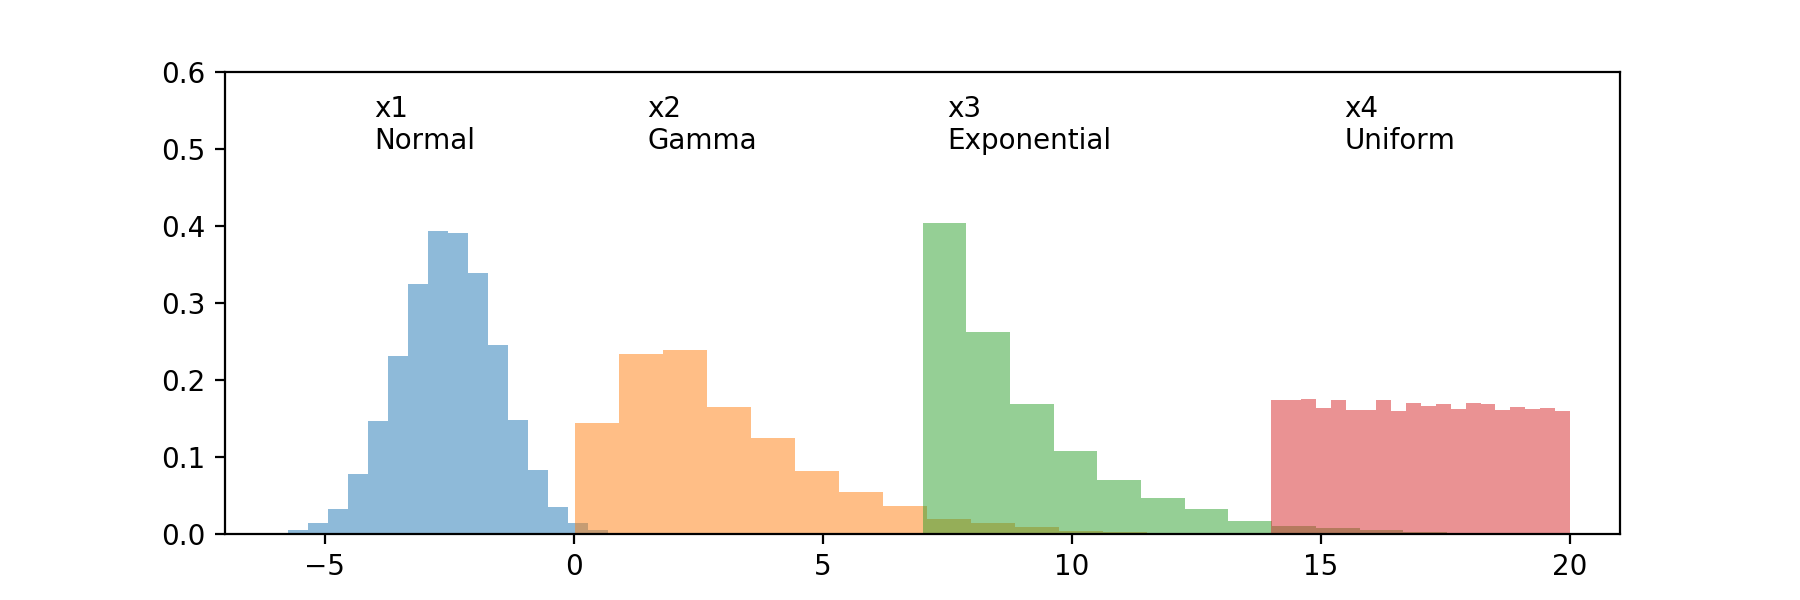

In [12]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


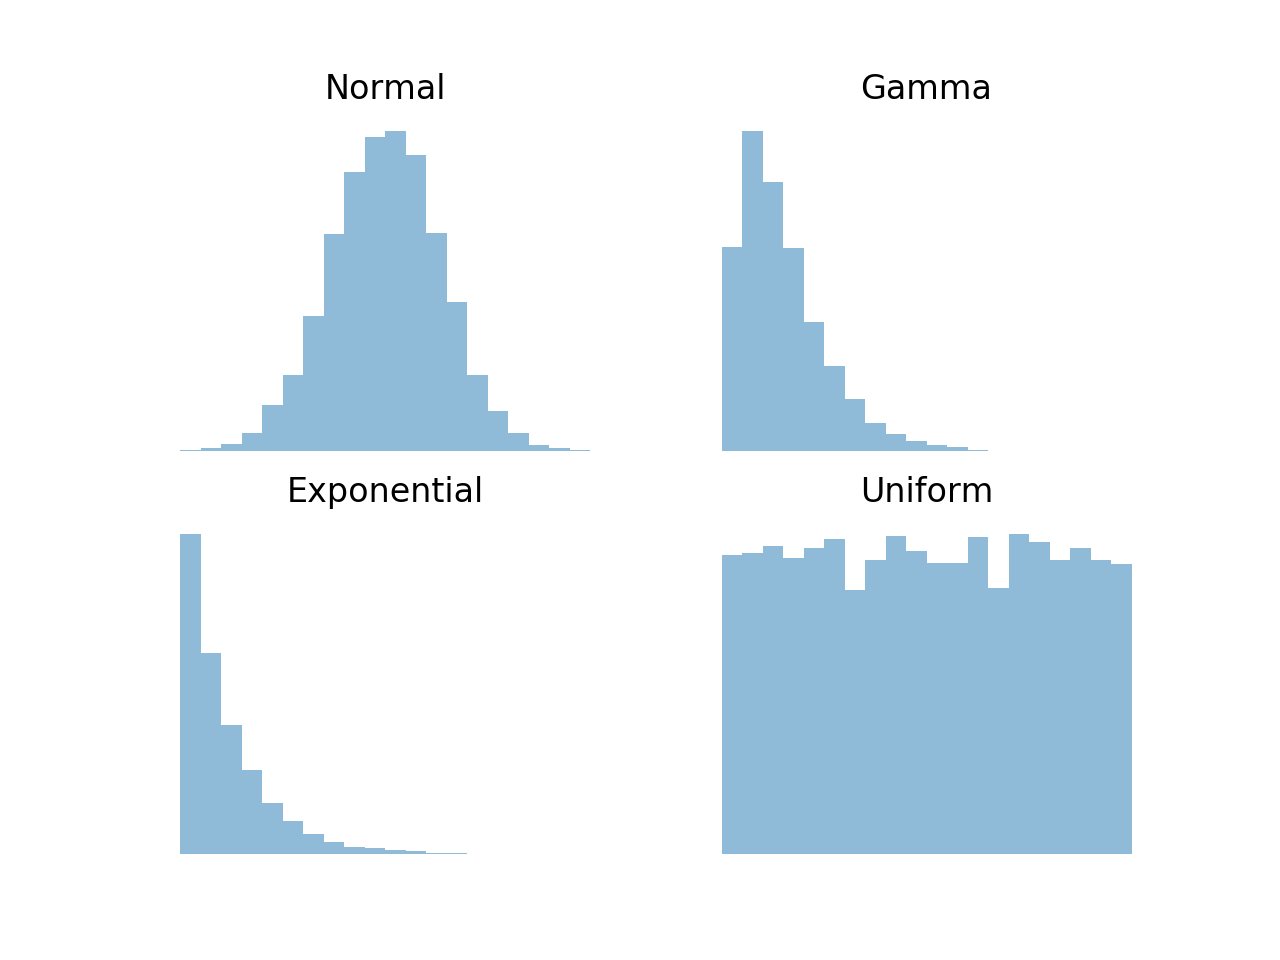

(13.702141613807761, 20.298257320076068, 0.0, 0.18701006091020519)

In [13]:
#Using Subplots

import matplotlib.pyplot as plt
import numpy as np

x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)


fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharex = False, sharey = False)
ax1.hist(x1, normed = True, bins = 20, alpha = 0.5)
ax2.hist(x2, normed = True, bins = 20, alpha = 0.5)
ax3.hist(x3, normed = True, bins = 20, alpha = 0.5)
ax4.hist(x4, normed = True, bins = 20, alpha = 0.5)

ax1.set_title('Normal')
ax2.set_title('Gamma')
ax3.set_title('Exponential')
ax4.set_title('Uniform')

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')

<IPython.core.display.Javascript object>


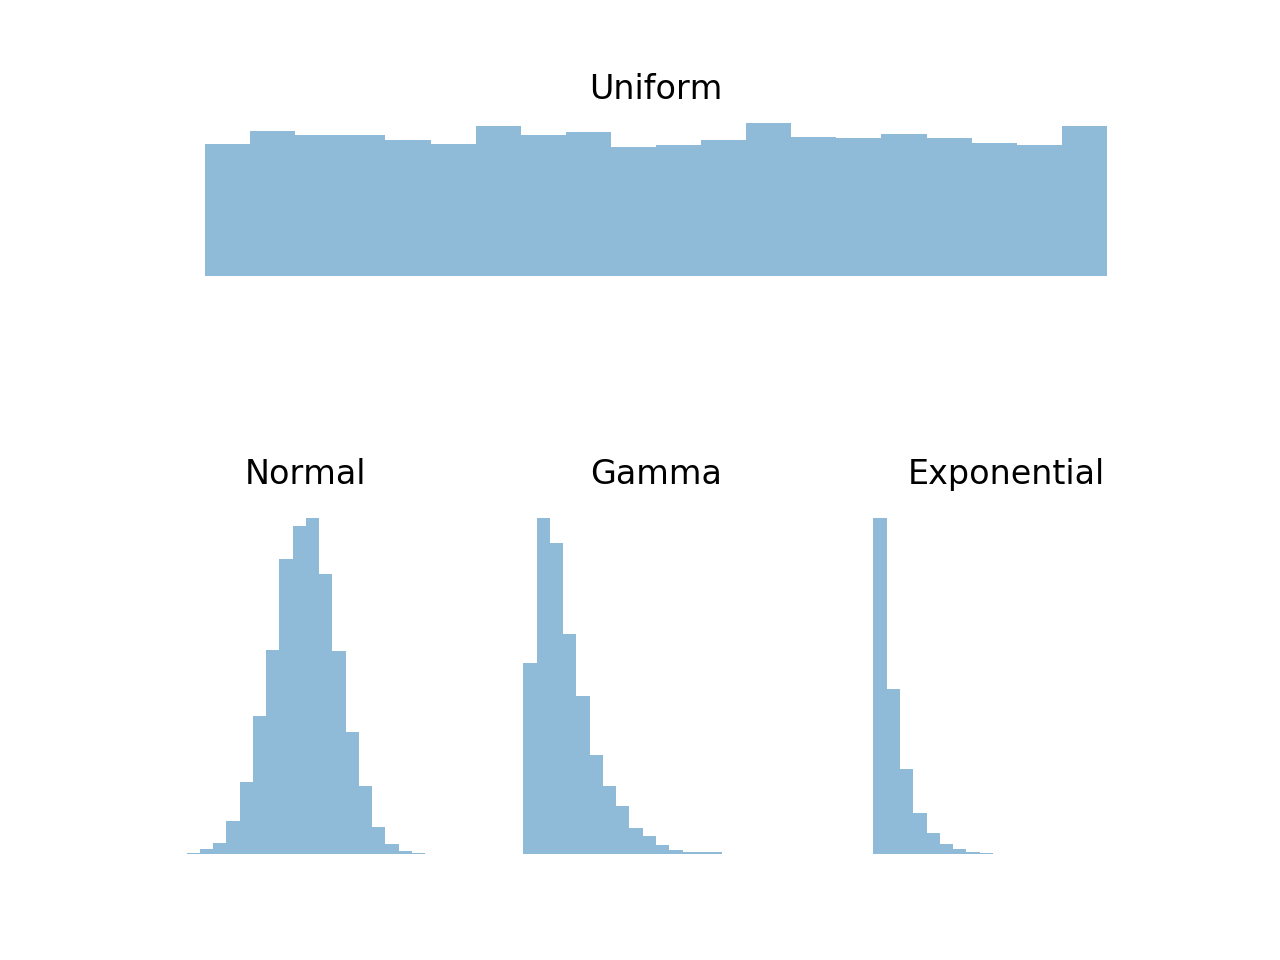

(5.6503668630509427, 35.346647479220259, 0.0, 0.3903377715823611)

In [14]:
# Using GridSpec 
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(4,3)
toprow = plt.subplot(gspec[0,:])
botleft = plt.subplot(gspec[2:,0])
botmid = plt.subplot(gspec[2:,1])
botright = plt.subplot(gspec[2:,-1])

x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

toprow.hist(x4, normed = True, bins = 20, alpha = 0.5)
botleft.hist(x1, normed = True, bins = 20, alpha = 0.5)
botmid.hist(x2, normed = True, bins = 20, alpha = 0.5)
botright.hist(x3, normed = True, bins = 20, alpha = 0.5)

toprow.set_title('Uniform')
botleft.set_title('Normal')
botmid.set_title('Gamma')
botright.set_title('Exponential')

toprow.axis('off')
botleft.axis('off')
botmid.axis('off')
botright.axis('off')


/opt/conda/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


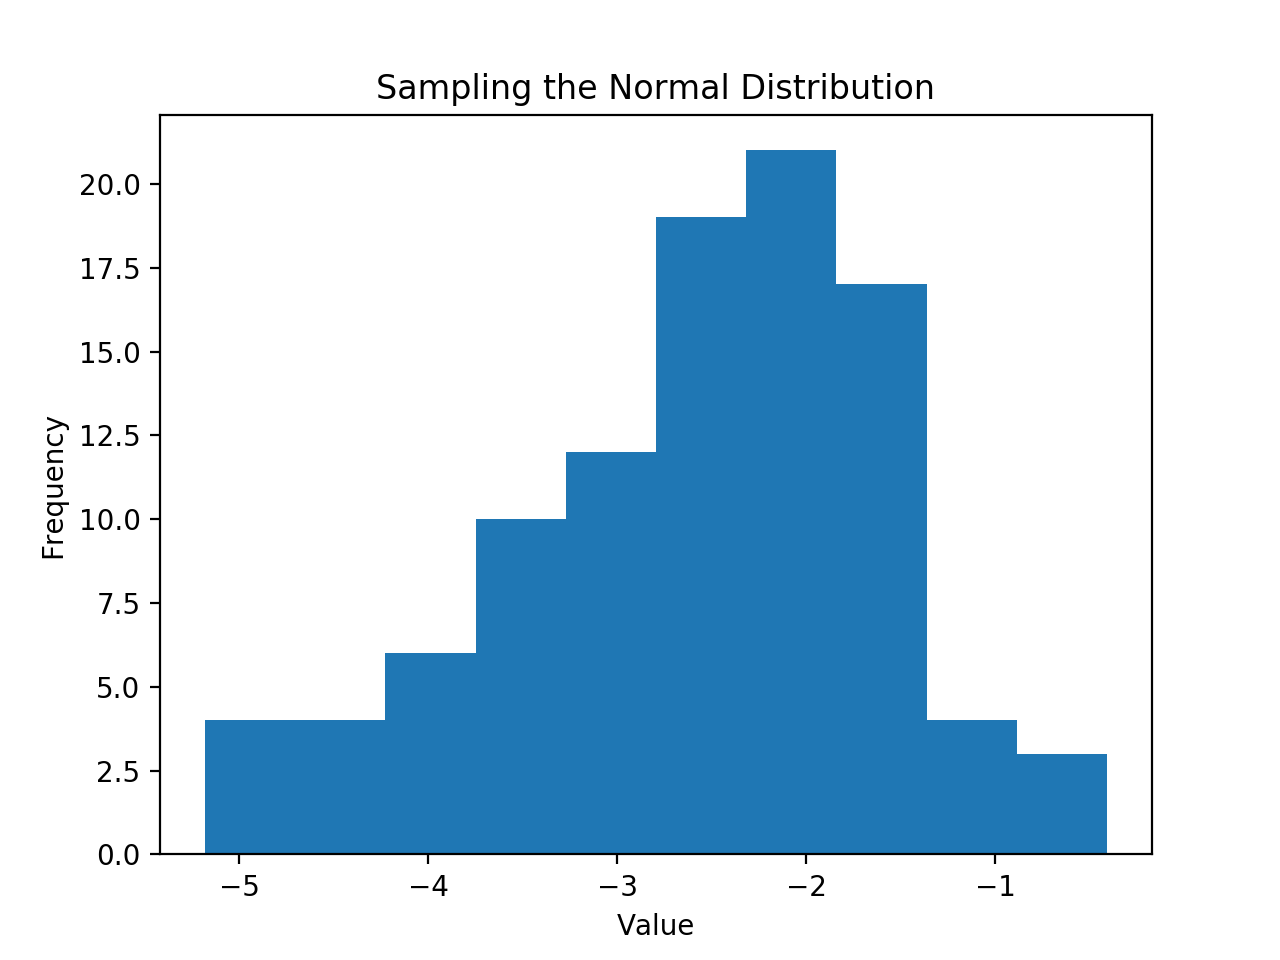

In [18]:
# Animations 
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec

n = 100

x1 = np.random.normal(-2.5, 1, n)
x2 = np.random.gamma(2, 1.5, n)
x3 = np.random.exponential(2, n)+7
x4 = np.random.uniform(14,20, n)

# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    plt.cla()
    plt.hist(x1[:curr])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,27])
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100)